In [ ]:
install.packages("devtools")
library(devtools)


# ********要重新啟動 jupyter Notebook********

In [ ]:

source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

In [ ]:
install.packages('abind')
install.packages('zoo')
install.packages('xts')
install.packages('quantmod')
install.packages('ROCR')
install.packages("bitops")



In [ ]:
# install.packages("DMwR")
# library(DMwR)

In [ ]:

install.packages("nnet")
install.packages("reshape")
install.packages("scales")



library(nnet)
library(reshape)
library(devtools)
library(scales)
library(ggplot2)


In [20]:
data(iris)

In [21]:
set.seed(50)

In [22]:
n <- nrow(iris)

In [23]:
t_size = round(0.7 * n)

In [24]:
t_idx <- sample(seq_len(n), size = t_size)

In [25]:
traindata <- iris[t_idx,]

In [26]:
testdata <- iris[ - t_idx,]

In [27]:
nnetM <- nnet(formula = Species ~ ., linout = T, size = 3, decay = 0.001, maxit = 1000, trace = T, data = traindata)

# weights:  27
initial  value 156.065658 
iter  10 value 86.734722
iter  20 value 16.835100
iter  30 value 6.274023
iter  40 value 5.749712
iter  50 value 4.797232
iter  60 value 4.195505
iter  70 value 4.131569
iter  80 value 4.083285
iter  90 value 4.069321
iter 100 value 4.012887
iter 110 value 3.865429
iter 120 value 3.523008
iter 130 value 3.122874
iter 140 value 2.959469
iter 150 value 2.895784
iter 160 value 2.814807
iter 170 value 2.776285
iter 180 value 2.764849
iter 190 value 2.762372
iter 200 value 2.761747
iter 210 value 2.761697
iter 220 value 2.761663
iter 230 value 2.761640
iter 240 value 2.761636
final  value 2.761635 
converged


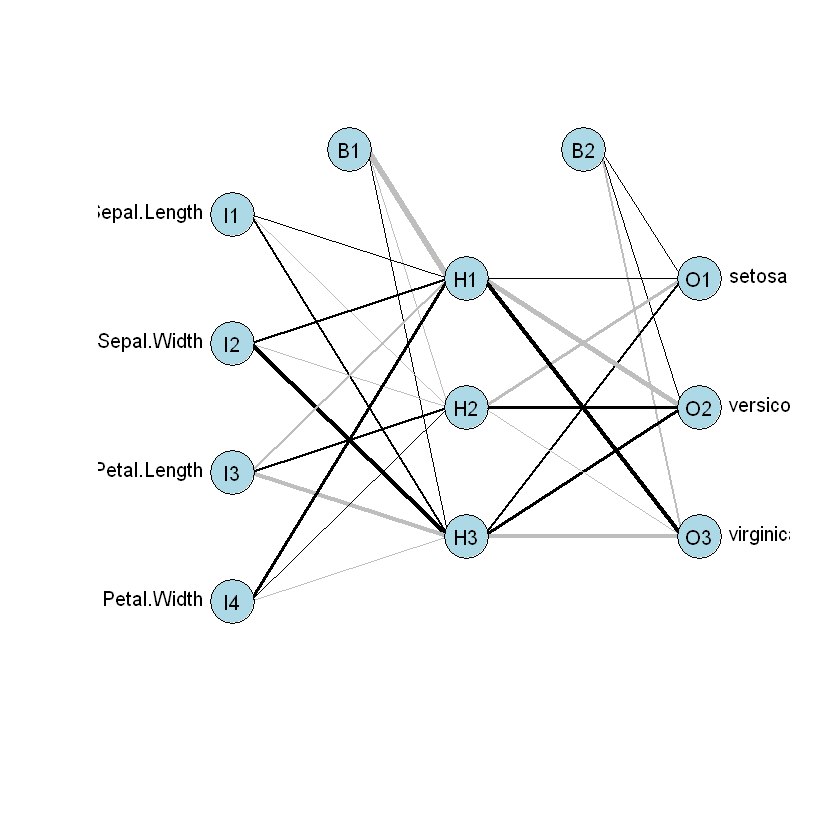

In [28]:
plot.nnet(nnetM, wts.only = F)

In [29]:
prediction <- predict(nnetM, testdata, type = 'class')

In [30]:
cm <- table(x = testdata$Species, y = prediction, dnn = c("實際", "預測"))
cm


            預測
實際         setosa versicolor virginica
  setosa         10          1         0
  versicolor      0         19         1
  virginica       0          3        11

In [31]:
NNaccuracy <- sum(diag(cm)) / sum(cm)

In [32]:
NNaccuracy

[1] 0.8888889

In [33]:
nnetM1 <- nnet(formula = Species ~ ., linout = T, size = 6, decay = 0.001, maxit = 1000, trace = T, data = traindata)

# weights:  51
initial  value 128.868046 
iter  10 value 34.394980
iter  20 value 5.868899
iter  30 value 5.509115
iter  40 value 3.923459
iter  50 value 3.235537
iter  60 value 3.030172
iter  70 value 2.890044
iter  80 value 2.744593
iter  90 value 2.684592
iter 100 value 2.109936
iter 110 value 1.763615
iter 120 value 1.599877
iter 130 value 1.532473
iter 140 value 1.494889
iter 150 value 1.447617
iter 160 value 1.401181
iter 170 value 1.372327
iter 180 value 1.342177
iter 190 value 1.329957
iter 200 value 1.324818
iter 210 value 1.322057
iter 220 value 1.318711
iter 230 value 1.314013
iter 240 value 1.310118
iter 250 value 1.303604
iter 260 value 1.297070
iter 270 value 1.292999
iter 280 value 1.290340
iter 290 value 1.289154
iter 300 value 1.288952
iter 310 value 1.288838
iter 320 value 1.288807
iter 330 value 1.288803
final  value 1.288802 
converged


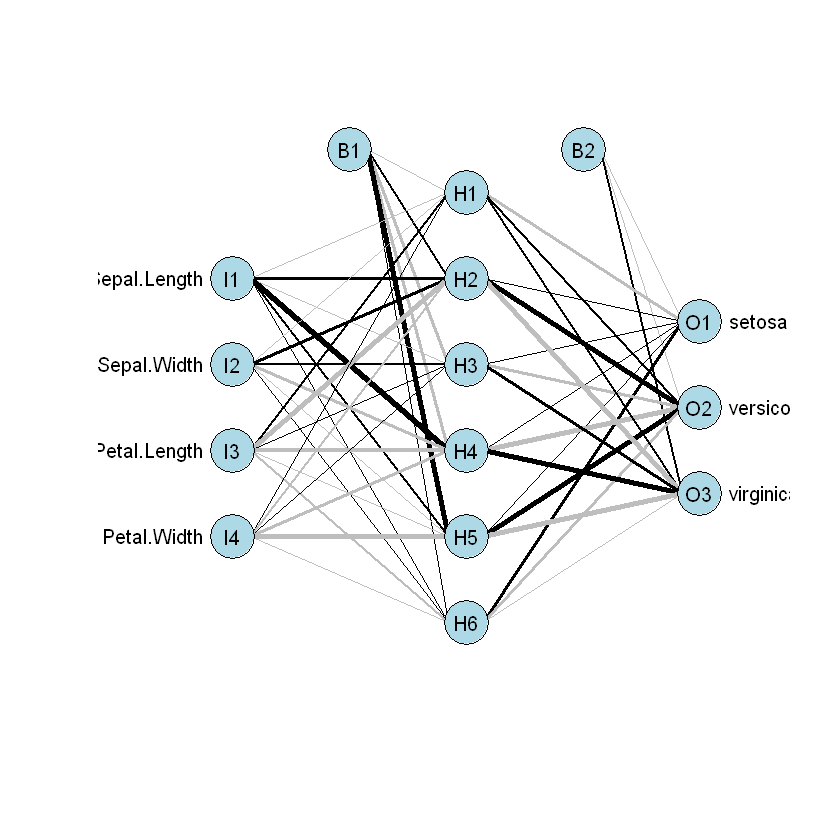

In [34]:
plot.nnet(nnetM1, wts.only = F)

In [35]:
prediction <- predict(nnetM1, testdata, type = 'class')

In [36]:
cm <- table(x = testdata$Species, y = prediction, dnn = c("實際", "預測"))
cm


            預測
實際         setosa versicolor virginica
  setosa         11          0         0
  versicolor      0         18         2
  virginica       0          1        13

In [37]:
NNaccuracy <- sum(diag(cm)) / sum(cm)

In [38]:
NNaccuracy

[1] 0.9333333

# 多層類神經網路

In [39]:
install.packages('neuralnet')


require(neuralnet)
require(nnet)      
require(caret)
require(devtools)


also installing the dependency 'Deriv'



package 'Deriv' successfully unpacked and MD5 sums checked
package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shli\AppData\Local\Temp\RtmpWESugP\downloaded_packages


Loading required package: neuralnet
Warning message:
"package 'neuralnet' was built under R version 3.6.3"Loading required package: caret
Loading required package: lattice


In [101]:
data <- iris
head(class.ind(data$Species))

setosa,versicolor,virginica
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0


In [102]:
tail(class.ind(data$Species))

,setosa,versicolor,virginica
"[145,]",0,0,1
"[146,]",0,0,1
"[147,]",0,0,1
"[148,]",0,0,1
"[149,]",0,0,1
"[150,]",0,0,1


In [103]:
data <- cbind(data, class.ind(data$Species))

In [104]:
data

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,setosa,versicolor,virginica
5.1,3.5,1.4,0.2,setosa,1,0,0
4.9,3.0,1.4,0.2,setosa,1,0,0
4.7,3.2,1.3,0.2,setosa,1,0,0
4.6,3.1,1.5,0.2,setosa,1,0,0
5.0,3.6,1.4,0.2,setosa,1,0,0
5.4,3.9,1.7,0.4,setosa,1,0,0
4.6,3.4,1.4,0.3,setosa,1,0,0
5.0,3.4,1.5,0.2,setosa,1,0,0
4.4,2.9,1.4,0.2,setosa,1,0,0
4.9,3.1,1.5,0.1,setosa,1,0,0


In [105]:
formula.bpn <- setosa + versicolor + virginica ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

In [106]:
set.seed(50)  

In [107]:
smp.size <- 0.7*nrow(data)
smp.size

[1] 105

In [108]:
train.ind <- sample(seq_len(nrow(data)), smp.size)
train <- data[train.ind, ]
test <- data[-train.ind, ]


In [109]:
bpn <- neuralnet(formula = formula.bpn, 
                  data = train,
                  hidden = c(1,3),       # 二個隱藏層：1個node, 3個node
                  learningrate = 0.01, # learning rate
                  threshold = 0.01,    # partial derivatives of the error function, a stopping criteria
                  stepmax = 500000        # 最大的ieration數 = 500000(5*10^5)
                  )


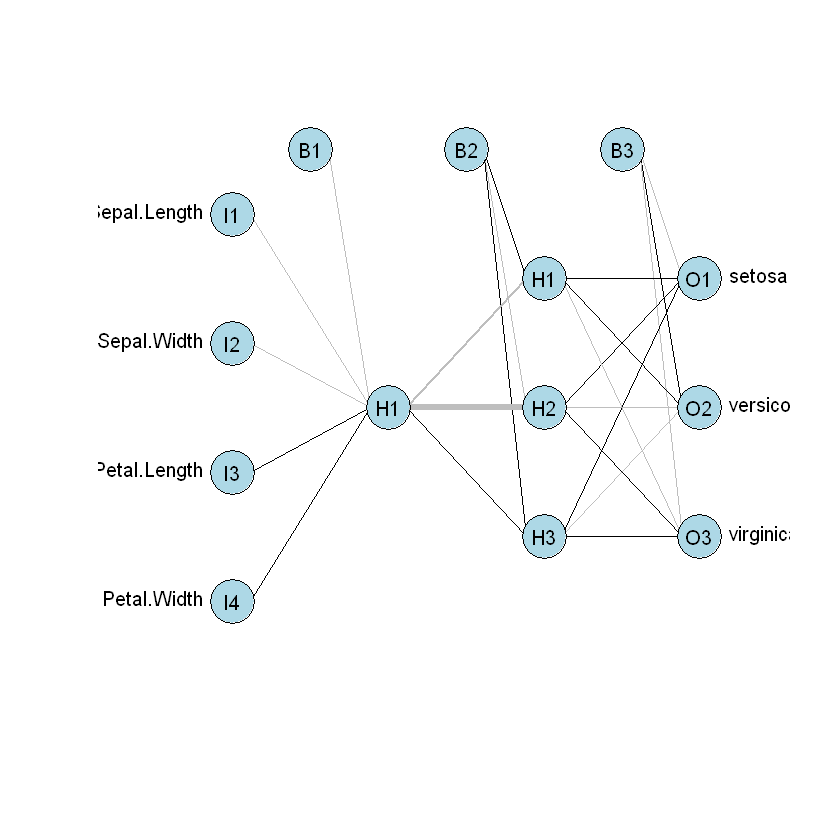

In [110]:
plot.nnet(bpn)

In [111]:
test[, 1:4]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
9,4.4,2.9,1.4,0.2
12,4.8,3.4,1.6,0.2
14,4.3,3.0,1.1,0.1
22,5.1,3.7,1.5,0.4
29,5.2,3.4,1.4,0.2
35,4.9,3.1,1.5,0.2
37,5.5,3.5,1.3,0.2
42,4.5,2.3,1.3,0.3
45,5.1,3.8,1.9,0.4
48,4.6,3.2,1.4,0.2


In [112]:
pred <- compute(bpn, test[, 1:4])  

In [113]:
pred.result <- round(pred$net.result)
pred.result


9,1,0,0
12,1,0,0
14,1,0,0
22,1,0,0
29,1,0,0
35,1,0,0
37,1,0,0
42,1,0,0
45,1,0,0
48,1,0,0
49,1,0,0


In [114]:
pred.result <- as.data.frame(pred.result)
pred.result$Species <- ""
for(i in 1:nrow(pred.result)){
  if(pred.result[i, 1]==1){ pred.result[i, "Species"] <- "setosa"}
  if(pred.result[i, 2]==1){ pred.result[i, "Species"] <- "versicolor"}
  if(pred.result[i, 3]==1){ pred.result[i, "Species"] <- "virginica"}
}

pred.result


,V1,V2,V3,Species
9,1,0,0,setosa
12,1,0,0,setosa
14,1,0,0,setosa
22,1,0,0,setosa
29,1,0,0,setosa
35,1,0,0,setosa
37,1,0,0,setosa
42,1,0,0,setosa
45,1,0,0,setosa
48,1,0,0,setosa


In [115]:
cm = table(real    = test$Species, 
      predict = pred.result$Species)
cm

            predict
real         setosa versicolor virginica
  setosa         11          0         0
  versicolor      0         20         0
  virginica       0          2        12

In [116]:
RFaccuracy <- sum(diag(cm)) / sum(cm)
RFaccuracy

[1] 0.9555556